<a href="https://colab.research.google.com/github/yuu19/advanced_data_lecture/blob/main/Chap_11_Applied_Data_Science_20230714.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ver 1.0

About version：The version is 1.0 when released in the google classroom and it will be updated if there are any changes.

### <font color='crimson'>**[Practice 1]Mnist** (20 mins)</font>

Make a neural network classifier for the Mnist dataset!

1. Convert the data from numpy to tensor data in order to use in the neural network.

1. Train your neural network with the X_train and y_train.

1. print confusion matrix and accuracy for test data after traininng.




In [ ]:

from torch.utils.data import TensorDataset, DataLoader
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import torch

digits = datasets.load_digits()

scaler = MinMaxScaler()
# Normalization
for i in range(len(digits['images'])):
  digits['images'][i] = scaler.fit_transform(digits['images'][i])




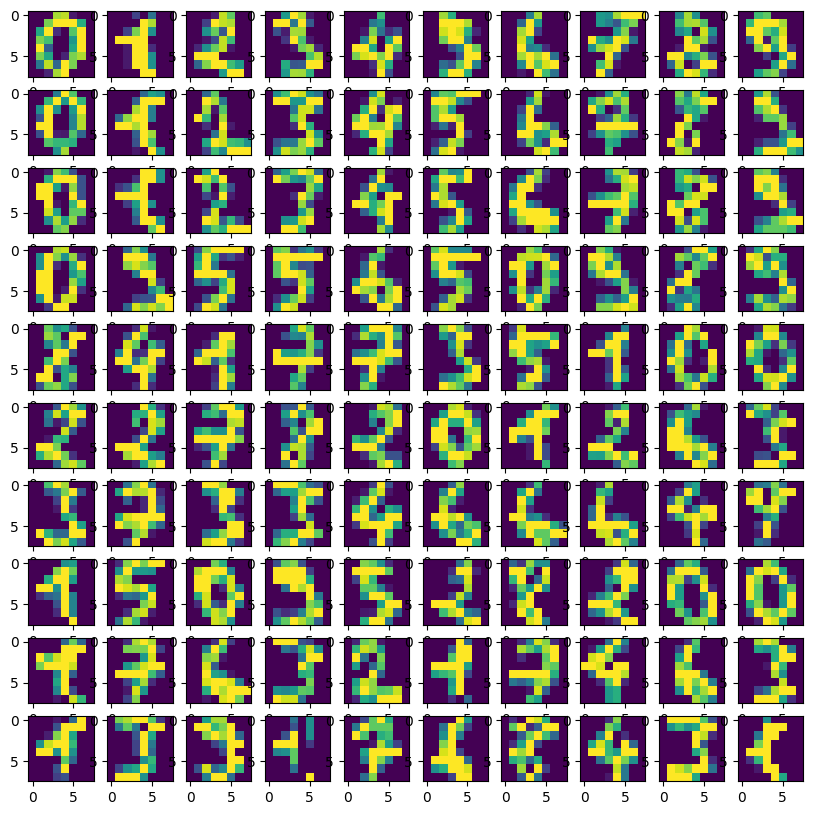

In [ ]:
import matplotlib.pyplot as plt

img = digits['data'].reshape(-1,8,8)
plt.figure(figsize=(10,10))
for i in range(100):
  plt.subplot(10, 10, i+1)
  plt.imshow(img[i])
plt.show()

In [ ]:
X = digits['data']
y = digits['target']

display(X.shape, y.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.5, random_state=0)

(1797, 64)

(1797,)

In [ ]:
y_train

array([1, 4, 9, 0, 4, 1, 1, 5, 9, 1, 4, 2, 6, 3, 9, 7, 6, 4, 8, 6, 8, 7,
       6, 0, 5, 9, 4, 7, 3, 4, 9, 4, 9, 7, 9, 1, 5, 6, 0, 0, 4, 3, 6, 1,
       0, 9, 4, 8, 7, 5, 9, 8, 4, 5, 0, 1, 6, 0, 5, 5, 0, 4, 3, 2, 8, 7,
       6, 3, 4, 2, 5, 8, 0, 6, 9, 4, 5, 4, 9, 7, 3, 3, 1, 4, 4, 2, 6, 8,
       1, 1, 0, 3, 7, 4, 6, 7, 4, 0, 5, 2, 9, 2, 1, 9, 2, 3, 1, 7, 7, 4,
       5, 6, 5, 6, 7, 8, 1, 4, 3, 4, 4, 3, 5, 3, 3, 4, 7, 9, 8, 0, 6, 1,
       9, 0, 8, 4, 1, 2, 3, 9, 7, 8, 8, 8, 3, 7, 5, 7, 0, 1, 7, 8, 3, 8,
       0, 4, 8, 6, 2, 3, 6, 7, 3, 7, 7, 1, 3, 5, 0, 9, 8, 5, 3, 1, 2, 0,
       3, 6, 0, 3, 4, 1, 2, 3, 1, 0, 5, 8, 9, 3, 9, 6, 6, 8, 9, 0, 7, 8,
       2, 0, 0, 7, 7, 4, 5, 3, 1, 8, 5, 9, 6, 2, 9, 7, 7, 9, 5, 4, 2, 6,
       6, 1, 3, 4, 7, 2, 8, 0, 6, 1, 6, 6, 5, 8, 4, 3, 0, 5, 2, 9, 9, 7,
       8, 0, 5, 0, 6, 3, 3, 5, 1, 5, 1, 7, 9, 6, 4, 5, 0, 1, 8, 7, 8, 8,
       8, 9, 8, 7, 7, 2, 2, 2, 8, 0, 7, 8, 6, 8, 0, 4, 2, 2, 3, 7, 9, 0,
       2, 0, 0, 2, 7, 1, 5, 6, 4, 0, 0, 5, 5, 3, 9,

In [ ]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

In [ ]:
from torch import nn
import numpy as np
import torch.optim as optim
import torch.nn.functional as F

# You can modify this model!

class My_net(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()
    self.input_layer = nn.Linear(n_input, 128)
    self.hidden_layer =  nn.Linear(128, 64)
    self.output_layer = nn.Linear(64, n_output)

    # Change point
    # Batch Normalization
    self.bn0 = nn.BatchNorm1d(128) # input -> hidden
    self.bn1 = nn.BatchNorm1d(5) # hidden -> output


  def forward(self, x):

    x = F.relu(self.input_layer(x))
    x = self.bn0(x)
    x = F.relu(self.hidden_layer(x))
    #x = self.bn1(x)
    x = self.output_layer(x)
    return x


In [ ]:
# Training Settings

Epochs = 1000 # Epoch
lr = 1e-2     # Learning rate

# Define network
model = My_net(X_train.shape[1], 10)

# Optimization method
# model.parameters() include all the weights for the neural network
optim = torch.optim.Adam(model.parameters(), lr=lr)

#  Loss function
criterion = nn.CrossEntropyLoss()

#  Record
losses = torch.zeros(Epochs)

# Set seed
torch.manual_seed(30)


# Training steps: 1. forward 2. backward 3. Update parameters, 4.Reset gradient values.

for epoch in range(Epochs):

  # 1. forward x --> loss  update loss
  fcst = model(X_train)
  loss = criterion(fcst, y_train) # The same as below
# loss = torch.mean((fcst - y_train)**2)

  # 2. backward loss ---> x update gradient values
  loss.backward()

  # 3. update parameters
  optim.step()

  # 4. reset gradient
  optim.zero_grad()

  # Record the loss
  losses[epoch] = loss.item()


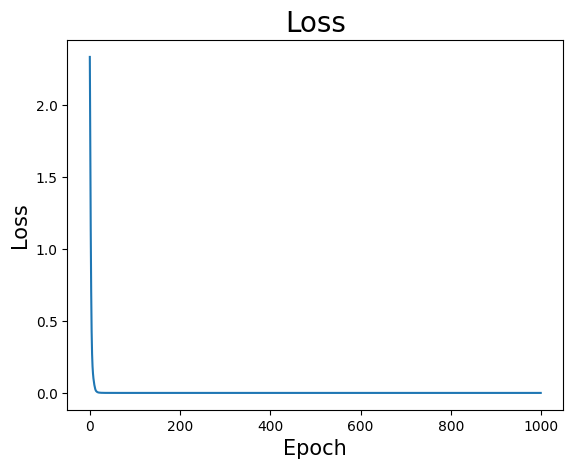

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title('Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.show()

In [ ]:
# Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def print_metrics(y_test, preds):
  print('Confusion Matrix\n', confusion_matrix(y_test, preds))
  print('Accuracy:{:.3f}'.format(accuracy_score(y_test, preds)))

# Your code here
preds = model(X_test) # score matrix
preds = preds.argmax(axis=1) # predicted_label by extracting the index for the highest scores.

print_metrics(y_test, preds)

Confusion Matrix
 [[ 89   0   0   0   0   0   0   0   0   0]
 [  0  85   1   0   0   0   1   0   2   1]
 [  0   1  91   0   0   0   0   0   0   0]
 [  1   0   2  86   0   0   0   1   3   0]
 [  0   0   0   0  76   0   0   0   0   0]
 [  0   0   0   0   1 102   1   0   0   4]
 [  0   1   0   0   1   0  87   0   0   0]
 [  0   1   0   0   1   0   0  76   0   0]
 [  1   3   0   0   1   1   0   1  84   1]
 [  0   0   1   0   0   2   0   1   0  88]]
Accuracy:0.961


# 12.<font color="Crimson">Convolutional Neural Network (CNN)</font>

## 12.1 <font color="Crimson">CNN</font>

Next, you will learn about the deep learning model **Convolution Neural Network (CNN)**, which is specialized for learning image data. **CNN** is characterized by its **Convolution Layer** and **Pooling Layer**. We will first learn about these two layers.

We will use a dog image as an example.

In [ ]:
! pip install Pillow #<-　Image library
!wget https://raw.githubusercontent.com/dgod1028/Tohoku_PBL/main/Dataset/inu.png

import numpy as np
from scipy import linalg
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('inu.png')
#gray_img = img.convert('L')

data = np.asarray(gray_img)

display(data.shape)
plt.imshow(data)

plt.grid(False)



--2023-07-14 02:14:01--  https://raw.githubusercontent.com/dgod1028/Tohoku_PBL/main/Dataset/inu.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22576 (22K) [image/png]
Saving to: ‘inu.png.1’

inu.png.1           100%[===================>]  22.05K  --.-KB/s    in 0.002s  

2023-07-14 02:14:01 (14.3 MB/s) - ‘inu.png.1’ saved [22576/22576]



NameError: ignored

### <font color='crimson'>Convolutional Layer</font>

Let's first consider observing this dog image from a human perspective. We are not going to check every $500\times500$ pixel and decide that it is a dog. You would be looking at the surrounding image, color boundaries, multiple adjacent pixels, and other information to make a comprehensive judgment.

　The neural network used in the previous lecture considered all pixels as explanatory variables and did not consider the position and continuity of surrounding images. This is not a reasonable image analysis.

　The convolution layer is responsible for extracting image features by synthesizing surrounding pixels.

　We will start with a simple matrix example in the next figure.

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=13IU45VosNmITu3gAaXcVpoQd4IiHMPJX" width="70%">

**Figure 11.1 Convolution and kernel**

</div>

In the convolution layer, the input data is passed through a **kernel** of $k\times k$-dimensions and a new matrix is output, which is called the **feature map**. Procedure,

 - First, define the dimensions and numerical values of the kernel.

 - At the input layer, extract blocks of data equal to the size of the kernel in order from the top left (corresponding to the blue blocks in the figure). In this example, it would be $[[1, 2], [0, 0]]$.

 - The sum of the products of the extracted data blocks and the kernel is the value of the first element of the new data matrix. The blue block yields $1\times1 + 2\times 0 + 0 \times 0 + 0 \times 1 = 1$.

 - Next, slide this block of data one block to the right (which will be the red block) and repeat the same calculation.

 - By repeating this process for all data, a new $3 \times 3$-dimensional feature map output layer is created.

 　This can be expressed in code as follows.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms

# Input data
input= torch.tensor([[1,  2,   3,  0],
                      [0,  0,   3,  0],
                      [0,  0,   3,  0],
                      [0,  0,   2,  0]], dtype=torch.float32)

# define kernel
kernel = torch.tensor([[1, 0], [0, 1]], dtype=torch.float32)
# define Convolution layer
Conv = torch.nn.Conv2d(in_channels=1,out_channels=3,kernel_size=2, stride=1, padding=0, bias = False)
# set the kernel for the convolution layer
Conv.weight.data = kernel.expand(1, 1, 2, 2) # (batch_size, channel_number, kernel_width, kernel_height)

output = Conv(input.view(1,1, 4,4))
print(output)

tensor([[[[1., 5., 3.],
          [0., 3., 3.],
          [0., 2., 3.]]]], grad_fn=<ConvolutionBackward0>)


In the ```torch.nn.Conv2d``` argument above,

- ```in_channels```: The number of channels in the input layer, set to 1 in this case because it is matrix data, but in the case of image data, it may include 2 dimensions (width * height) and color channels (R,G,B, Alpha).

- ```out_channels```: The number of channels to output in the convolution layer.

- ````kernel_size```: Size of the kernel in $k \times k$ dimensions.

- ```stride```: The width of the slide. In the example in Figure 11.1, if ``stride=1``, the calculation will slide to the red block after the blue block, but if ``stride=2``, the red block will be skipped, the calculation will be done in the green block, and the output layer will be $2 \times 2$.

- ```padding```: Adding data to both sides of the data matrix, as shown in Figure 11.2 (default is 0). The purpose is to make it easier to extract features by increasing the width, since it is harder for the kernel to extract features from the data at the edges. If ``padding=0``, no data will be added.

- ```bias```: A learnable bias term is added to the output.

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=1SanWsrR21G4I7A_CcsZbAFo-R69f5398&" width="50%">

**Figure 11.2 Padding**

</div>

- Various kernels

Extract Edge


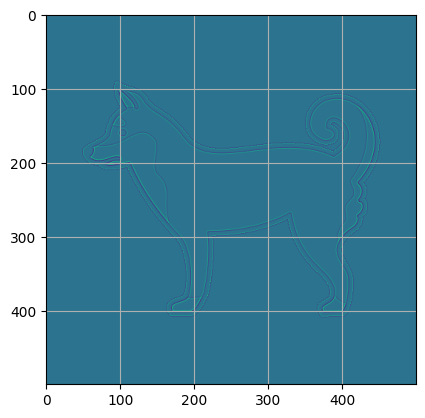

Blur image


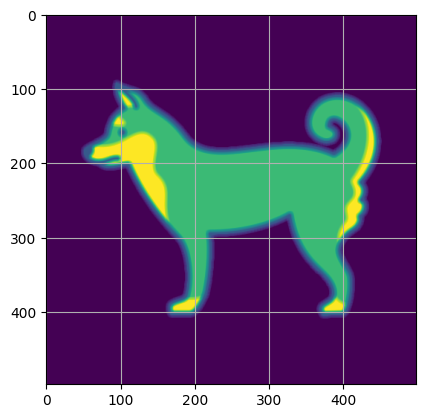

Clear Image


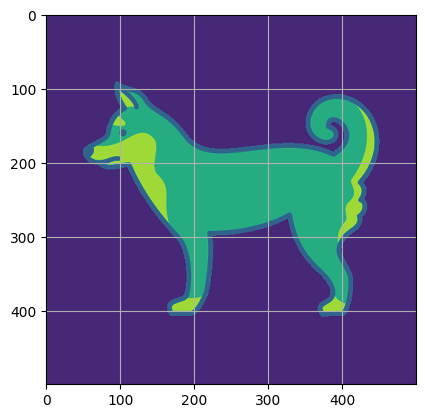

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms

# Blur
k = 9
edge_kernel = torch.tensor([[-1,  -1,  -1],
                            [-1,  8,  -1],
                            [-1,  -1,  -1]], dtype=torch.float32)

blur_kernel = torch.tensor([[10, 10,  10, 10, 10],
                            [10,   0,   0,  0, 10],
                            [10,   0,   0,  0, 10],
                            [10,   0,   0,  0, 10],
                            [10,  10,  10, 10, 10]], dtype=torch.float32)

detail_kernel = torch.tensor([[0,  -1,  0],
                              [-1,  10,  -1],
                               [0,  -1,  0]], dtype=torch.float32)

convert_tensor = transforms.ToTensor()
img_tensor = convert_tensor(gray_img).view(-1,1, 500, 500)



def extract_feature(img_tensor, kernel, name=None):
  kernel_size = kernel.size()[0]
  kernel = kernel.expand(1, 1, kernel_size , kernel_size)
  Conv = torch.nn.Conv2d(in_channels=1,out_channels=1,kernel_size=kernel_size, stride=1, padding=1, bias = False)
  Conv.weight.data = kernel

  Output = Conv(img_tensor).detach().clone()
  size = Output.size()[2]
  print(name)
  plt.imshow(Output.view(size, size)) # Draw
  plt.grid()
  plt.show()

extract_feature(img_tensor, edge_kernel, 'Extract Edge')
extract_feature(img_tensor, blur_kernel, 'Blur image')
extract_feature(img_tensor, detail_kernel, 'Clear Image')


This filter is human-determined and we do not know which filter will actually help identify the dog; the CNN is designed for this filter to be automatically trained by a neural network.

### <font color='crimson'>Pooling Layer</font>

　Next, we introduce the pooling layer, which is often used together with the convolutional layer in image analysis.

　The pooling layer is a hidden layer that performs DownSampling on the feature map and is used to reduce the resolution of the feature map by one step.

- **Max Pooling**

　Figure 11.2 shows the Max Pooling method often used for pooling layers.

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=13LuTmPDahxoRekUQqmGBCMJQpfoXVLrb" width="80%">

**Figure 11.2 Max Pooling**
</div>

**Max Pooling** is simply a method of taking one maximum value from the kernel's internal matrix. As shown in the figure, using a kernel of $2 \times 2$, an image of $4 \times 4$ will be compressed into an image of $2 \times 2$. There are other methods such as **Mean Pooling** (taking the average of the elements inside the kernel), but since **Max Pooling** performs better in our experience, we generally give preference to **Max Pooling**. Pooling layer is heavily used in image analysis for the following reasons

- 1) It corrects the sensitivity to image rotation, translation, and scale, which are considered weak points of convolutional layers. For example, if we observe the number "2" written by various people at 4K resolution, we can see various differences in length, bending, and other details. However, if we reduce the resolution to $10 \times 10$ by pooling several times, the "2" written by the majority of people will look the same.

- 2) By reducing the resolution of the image through downsampling, the size of the data is reduced and many of the parameters required for training are also reduced, which simultaneously improves computational efficiency.

- **Global Average Pooling**

**Global Average Pooling** is a pooling layer proposed for image analysis as a hidden layer that leads to an output layer at the end. First, Figure 11.3 illustrates the basic CNN flow.

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=13COUMIdfFd-NGKOLFSVgmzhGKpIofKA7" width="100%">

**Figure 11.3 CNN**
</div>

CNN basically overlaps convolutional and pooling layers several times to detect a large number of small **feature maps** (256 feature maps of $64 \times 64$ in the figure) from an image. The last hidden layer before **Softmax** activation is **Global Average Pooling**, but before this was proposed **Full connected layer** was used. This is the same as the hidden layer with ``nn.linear`` linear function used in the regression problems in this lecture, but using it for images requires training parameters equivalent to $64 \times 64 \times 256$ as the output of the last pooling layer, and the computational cost is very The computational cost would be very high. As an alternative, the proposed **Global Average Pooling** compresses each channel into a one-dimensional vector of length 256 by using the average value, as shown in Figure 11.4.

**Besides, the pooling layer is much more computationally efficient since there are no parameters that need to be trained.**

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=13Es-c9Vwm2cAZ8HuWk7Nl5CtfyjlsxEp" width="70%">

**Figure 11.4 Global Average Pooling**
</div>

### **Data Format**

The required data format for using CNN is a 4-dimensional data with <font color='crimson'>**(Data size、Num of channel, Height, Width)**</font>

### **Design of CNN**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class My_CNN(nn.Module):
    def __init__(self, size, n_output ,in_channel=1):
        # here, parameter size means the height (or width) of an image.
        # It is used for computing the kernel size for GAP.
        super(My_CNN, self).__init__()

        # Main

        self.conv1 = nn.Conv2d(in_channels=in_channel,  out_channels=32, kernel_size=3, padding=1, stride=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1, stride=1)
        self.fc = nn.Linear(64, n_output)

        # Pooling
        self.pool = nn.MaxPool2d(kernel_size=2)

        # GAP
        # It can be converted to a scalar by applying a kernel of the same size as the image size.
        # Reason for kernel size / 4:
        # Since the pool is applied twice in forward(), size / 4 will be the compressed image size.
        self.global_pool = nn.AvgPool2d(kernel_size=int(size / 4))


    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        x = self.global_pool(x)
        x = x.reshape(-1, 64) # (1 * channel)
        x = self.fc(x)
        return x

### <font color='crimson'>[Practice 2] **Use CNN to classify Mnist** (remained) </font>

1. Train your CNN with the X_train and y_train.You may need some preprocessing for the data.

1.  print confusion matrix and accuracy for test data after traininng.

<details>

<summary> Hint - Format of X_train, X_test</summary>

- The shape of X should be (Data size、Num of channel, Height, Width)


</details>



In [ ]:

from torch.utils.data import TensorDataset, DataLoader
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import torch

digits = datasets.load_digits()

scaler = MinMaxScaler()
#
for i in range(len(digits['images'])):
  digits['images'][i] = scaler.fit_transform(digits['images'][i])
digits['images'] = torch.from_numpy(digits['images'])
digits['target'] = torch.from_numpy(digits['target'])




In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

x = digits['data'].reshape(-1, 64)
y = digits['target']
display(x)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state=0)

# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

display(X_train.shape, y_train.shape)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       [0.        , 0.        , 0.125     , ..., 0.75      , 0.        ,
        0.        ],
       [0.        , 0.        , 0.45454545, ..., 0.73333333, 0.125     ,
        0.        ]])

(898, 64)

torch.Size([898])

In [ ]:
# Your code

# Preprocessing

# 1. reshape to 4 dimensional data
X_train = X_train.reshape((-1, 1, 8, 8))
X_test = X_test.reshape((-1, 1, 8, 8))

# 2. convert to a tensor data
X_train = torch.from_numpy(X_train).float()
X_test  = torch.from_numpy(X_test).float()

In [ ]:
# Training Settings

Epochs = 1000 # Epoch
lr = 1e-2     # Learning rate

# Define network
model = My_CNN(X_train.shape[2], 10)

# Optimization method
# model.parameters() include all the weights for the neural network
optim = torch.optim.Adam(model.parameters(), lr=lr)

#  Loss function
criterion = nn.CrossEntropyLoss()

#  Record
losses = torch.zeros(Epochs)

# Set seed
torch.manual_seed(30)


# Training steps: 1. forward 2. backward 3. Update parameters, 4.Reset gradient values.

for epoch in range(Epochs):

  # 1. forward x --> loss  update loss
  fcst = model(X_train)
  loss = criterion(fcst, y_train) # The same as below
# loss = torch.mean((fcst - y_train)**2)

  # 2. backward loss ---> x update gradient values
  loss.backward()

  # 3. update parameters
  optim.step()

  # 4. reset gradient
  optim.zero_grad()

  # Record the loss
  losses[epoch] = loss.item()


KeyboardInterrupt: ignored

In [ ]:
# Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def print_metrics(y_test, preds):
  print('Confusion Matrix\n', confusion_matrix(y_test, preds))
  print('Accuracy:{:.3f}'.format(accuracy_score(y_test, preds)))

# Your code here
preds = model(X_test) # score matrix
preds = preds.argmax(axis=1) # predicted_label by extracting the index for the highest scores.

print_metrics(y_test, preds)

Confusion Matrix
 [[ 89   0   0   0   0   0   0   0   0   0]
 [  0  86   0   1   0   1   1   0   0   1]
 [  0   0  89   0   0   0   0   0   3   0]
 [  0   2   0  88   0   1   0   0   2   0]
 [  0   1   0   0  75   0   0   0   0   0]
 [  0   0   0   1   0 106   0   0   0   1]
 [  0   1   0   0   0   0  88   0   0   0]
 [  0   0   0   0   0   0   0  78   0   0]
 [  0   4   0   0   1   1   0   1  85   0]
 [  0   0   0   0   0   2   0   0   0  90]]
Accuracy:0.972


- Additional part

Classify my hand-write image!

In [ ]:
!wget https://raw.githubusercontent.com/dgod1028/Research/main/data/my_mnist.png

--2023-07-14 02:39:27--  https://raw.githubusercontent.com/dgod1028/Research/main/data/my_mnist.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1534 (1.5K) [image/png]
Saving to: ‘my_mnist.png.1’

my_mnist.png.1      100%[===================>]   1.50K  --.-KB/s    in 0s      

2023-07-14 02:39:27 (18.8 MB/s) - ‘my_mnist.png.1’ saved [1534/1534]



(8, 8)

array([[0. , 0. , 0. , 0.4, 0.6, 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0.6, 0.5, 0.7, 0. , 0. ],
       [0. , 0. , 0.7, 0.2, 0.3, 0.5, 0. , 0. ],
       [0. , 0. , 0.3, 0.8, 0.9, 0.2, 0. , 0. ],
       [0. , 0. , 0.3, 0.7, 0.8, 0.2, 0. , 0. ],
       [0. , 0.1, 0.8, 0.2, 0.5, 0.4, 0. , 0. ],
       [0. , 0. , 0.8, 0.7, 0.9, 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0.3, 0.1, 0. , 0. , 0. ]])

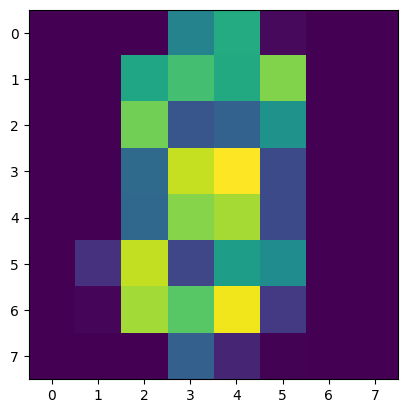

In [ ]:
import numpy as np
from scipy import linalg
from PIL import Image
import matplotlib.pyplot as plt

def resize(path):
  # path of your jpg file, e.g., 'tshirt.jpg'
  img = Image.open(path).resize((8,8))
  gray_img = img.convert('L')

  data = np.asarray(gray_img).astype(float)

  display(data.shape)


  # 0-1
  data[:] = (255 - data)/255 # modify this part if needed

  plt.imshow(data)

  plt.grid(False)
  return data


df = resize('my_mnist.png')
np.round(df,1)

## 12.2. <font color="Crimson">DataLoader and online, batch training</font>

　So far we have used all of the training data for gradient value calculation, but as the number of data becomes huge (over tens of GB), the computational cost becomes huge as well. For such large data sets, we will introduce a method to efficiently train on a portion of the data.

###<font color="Crimson">**Mini batch learning**</font>

  <div align="center">

<img src="https://drive.google.com/uc?export=view&id=1EPSvxrHVDBb0_va9KSTCtTfBBS5IDCQx" width="80%">

**Figure 11.5 Learning method**


</div>

**Batch learning**


### <font color="Crimson">**DataLoader**</font>

　With **pytorch**, it is relatively easy to create mini-batchable standardized datasets by using **TensorDataSet** and **DataLoader**. The **TensorDataSet** is the dataset that contains all the data, and the **Dataloader** is used to output the mini-batched dataset from the **TensorDataset**.

　The basics of your own **TensorDataset** can be written as follows

In [ ]:
import torch
from torch.utils.data import TensorDataset

# Create dataset
# cosine function
x = torch.arange(-10, 10, 0.1).view(-1, 1)
y = torch.cos(x) + torch.normal(0, 0.1, size=(200, 1))

# Here we input the data
dataset = TensorDataset(x, y)

# Number of data
print('Num of data: %i' % len(dataset))

# Print data
print('First data: x: ', dataset[0][0], ',y: ', dataset[0][1])
print('Second data: x: ', dataset[1][0], ',y: ', dataset[1][1])


Num of data: 200
First data: x:  tensor([-10.]) ,y:  tensor([-0.6762])
Second data: x:  tensor([-9.9000]) ,y:  tensor([-0.9005])



　After the dataset is created, it can be passed to **DataLoader** to output mini-batch data.

In [ ]:
from torch.utils.data import DataLoader
dataloader1 = DataLoader(dataset,
                         batch_size=32,
                         shuffle=True,
                         drop_last=True)


Where.

- ```batch_size```: The size of the mini-batch, where 1 means online learning and the other means mini-batch learning. The larger the batch size, the more efficient it is (e.g., 512, 1028, etc.), as long as the memory allows. The computational efficiency here refers to the time required for a single training (Epoch), not necessarily the learning efficiency (time until the loss function converges).

- ```shuffle```: If ``True``, shuffle the data and output.

- ```drop_last```: If you have 10001 data and set ```batch_size=1000```, the last data will be the last one left, and the last mini-batch training will be trained on one data, which may cause more outliers, ```drop_ drop=True``` to drop data if the size of the last mini-batch is less than ```batch_size```. Note that ```shuffle=False``` will discard the same data at the end of every Epoch and will not be used at all.

　***DataLoader*** loops through ``for`` statements to output a different mini-batch of data sets each time.

In [ ]:
dataloader1 = DataLoader(dataset,
                         batch_size=1,
                         shuffle=False,
                         drop_last=True)
print('\n======== batch size: 1 ==========\n')
print('======== Shuffle: False ==========\n')
Count = 4
for i, data in enumerate(dataloader1):
  print(i, data)
  if i == Count:
    break


print('\n======== batch size:2 ==========\n')
print('======== Shuffle: True ==========\n')
dataloader2 = DataLoader(dataset,
                         batch_size=2,
                         shuffle=True,
                         drop_last=True)
for i, data in enumerate(dataloader2):
  print(i, data)
  if i == Count:
    break


======== batch size: 1 ==========

======== Shuffle: False ==========

0 [tensor([[-10.]]), tensor([[-0.7045]])]
1 [tensor([[-9.9000]]), tensor([[-0.7781]])]
2 [tensor([[-9.8000]]), tensor([[-0.8785]])]
3 [tensor([[-9.7000]]), tensor([[-1.0205]])]
4 [tensor([[-9.6000]]), tensor([[-1.0312]])]

======== batch size:2 ==========

======== Shuffle: True ==========

0 [tensor([[ 8.1000],
        [-9.7000]]), tensor([[-0.1575],
        [-1.0205]])]
1 [tensor([[5.2000],
        [2.0000]]), tensor([[ 0.5284],
        [-0.5161]])]
2 [tensor([[ 6.5000],
        [-9.2000]]), tensor([[ 1.0194],
        [-0.8114]])]
3 [tensor([[2.6000],
        [2.5000]]), tensor([[-0.6364],
        [-0.8058]])]
4 [tensor([[-2.7000],
        [ 8.8000]]), tensor([[-0.8025],
        [-0.8247]])]


  <div align="center">

<img src="https://drive.google.com/uc?export=view&id=138H-Bze8C6aiOlyvzk-TZ-j7pFmThx2F" width="100%">

**Figure 11.6 Difference**

</div>

- **Difference 1** - $x$ and $y$.

In mini-batch learning, only a portion of the data is used at a time to update parameters. Therefore,

- 1. retrieve a portion of x and y from DataLoader each time. (another loop is added) 2.

- 2. put the retrieved data into the specified device. Example: `x_batch = x_batch.to(device)`

- 3. use x_batch and y_batch instead of x and y in the forward calculation.

- **Difference 2** - loss

In mini-batch learning, only a portion of the loss is calculated at a time, so we need to define `total_loss` and sum up the loss for each batch learning.